In [1]:
!pip install regressors

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from regressors import stats

In [3]:
df = pd.read_excel("fsi-2020.xlsx", header=[0])
#pd.read_excel("/tmp/sample.xlsx", usecols = "B:F", skiprows=[0])

In [4]:
    dictionary = {"key1": "value1"}
print(dictionary["key1"])

value1


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.dtypes)

Country                                     object
Year                                datetime64[ns]
Rank                                        object
Total                                      float64
C1: Security Apparatus                     float64
C2: Factionalized Elites                   float64
C3: Group Grievance                        float64
E1: Economy                                float64
E2: Economic Inequality                    float64
E3: Human Flight and Brain Drain           float64
P1: State Legitimacy                       float64
P2: Public Services                        float64
P3: Human Rights                           float64
S1: Demographic Pressures                  float64
S2: Refugees and IDPs                      float64
X1: External Intervention                  float64
Change from Previous Year                  float64
dtype: object


In [6]:
df

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Yemen,2020-01-01,1st,112.438694,9.700000,10.0,9.69887,9.400000,7.800000,7.000000,9.889823,9.500000,9.950000,9.800000,9.7,10.000000,-1.061306
1,Somalia,2020-01-01,2nd,110.888959,9.811328,10.0,8.60000,9.100000,9.367151,8.900000,8.888107,9.100000,9.000000,9.981087,9.1,9.041286,-1.311041
2,South Sudan,2020-01-01,3rd,110.752190,9.400000,9.7,9.10000,9.500000,9.200000,6.800000,9.944415,9.500000,9.000000,9.450357,9.7,9.457419,-1.447810
3,Syria,2020-01-01,4th,110.749697,9.900000,9.9,10.00000,8.686367,7.200000,8.413343,9.950000,9.100000,10.000000,7.600000,10.0,9.999986,-0.850303
4,Congo Democratic Republic,2020-01-01,5th,109.394621,8.500000,9.8,9.70000,8.000000,8.619842,6.900000,9.660971,9.464911,9.548897,9.800000,10.0,9.400000,-0.805379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Iceland,2020-01-01,174th,17.800000,1.000000,1.8,0.70000,2.800000,1.000000,2.200000,0.700000,0.700000,0.700000,1.000000,1.7,3.500000,-2.000000
174,Denmark,2020-01-01,175th,17.213587,1.600000,1.4,4.00000,1.300000,0.900000,1.600000,0.600000,0.913587,1.400000,1.300000,1.7,0.500000,-2.286413
175,Switzerland,2020-01-01,176th,17.094086,1.400000,1.0,3.00000,1.600000,1.500000,1.400000,0.500000,1.052499,1.100000,1.241587,2.8,0.500000,-1.605914
176,Norway,2020-01-01,177th,16.191210,1.800000,1.1,3.60000,1.691210,0.700000,1.000000,0.500000,1.100000,0.600000,0.900000,2.5,0.700000,-1.808790


In [7]:
# Create dummy variables for the category_columns and merge on the numeric_columns to create an X dataset
# Define target data
# Create category_columns and numeric_columns variables
X = df.drop(['Country', 'Year','Total', 'Rank', 'C2: Factionalized Elites'], axis=1)
X 

,C1: Security Apparatus,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,9.700000,9.69887,9.400000,7.800000,7.000000,9.889823,9.500000,9.950000,9.800000,9.7,10.000000,-1.061306
1,9.811328,8.60000,9.100000,9.367151,8.900000,8.888107,9.100000,9.000000,9.981087,9.1,9.041286,-1.311041
2,9.400000,9.10000,9.500000,9.200000,6.800000,9.944415,9.500000,9.000000,9.450357,9.7,9.457419,-1.447810
3,9.900000,10.00000,8.686367,7.200000,8.413343,9.950000,9.100000,10.000000,7.600000,10.0,9.999986,-0.850303
4,8.500000,9.70000,8.000000,8.619842,6.900000,9.660971,9.464911,9.548897,9.800000,10.0,9.400000,-0.805379
...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.000000,0.70000,2.800000,1.000000,2.200000,0.700000,0.700000,0.700000,1.000000,1.7,3.500000,-2.000000
174,1.600000,4.00000,1.300000,0.900000,1.600000,0.600000,0.913587,1.400000,1.300000,1.7,0.500000,-2.286413
175,1.400000,3.00000,1.600000,1.500000,1.400000,0.500000,1.052499,1.100000,1.241587,2.8,0.500000,-1.605914
176,1.800000,3.60000,1.691210,0.700000,1.000000,0.500000,1.100000,0.600000,0.900000,2.5,0.700000,-1.808790


In [8]:
# Fill in missing values in X with zeroes
X = X.fillna(0)
y = df['C2: Factionalized Elites']

In [9]:
pd.set_option('display.max_columns', 500)

In [10]:
X.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

C1: Security Apparatus              True
C3: Group Grievance                 True
E1: Economy                         True
E2: Economic Inequality             True
E3: Human Flight and Brain Drain    True
P1: State Legitimacy                True
P2: Public Services                 True
P3: Human Rights                    True
S1: Demographic Pressures           True
S2: Refugees and IDPs               True
X1: External Intervention           True
Change from Previous Year           True
dtype: bool

In [11]:
X.dtypes

C1: Security Apparatus              float64
C3: Group Grievance                 float64
E1: Economy                         float64
E2: Economic Inequality             float64
E3: Human Flight and Brain Drain    float64
P1: State Legitimacy                float64
P2: Public Services                 float64
P3: Human Rights                    float64
S1: Demographic Pressures           float64
S2: Refugees and IDPs               float64
X1: External Intervention           float64
Change from Previous Year           float64
dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

In [13]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train.head()

,C1: Security Apparatus,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
171,3.0,1.4,1.506904,1.200000,0.840992,0.500000,0.861307,0.600000,1.300000,4.6,0.6,-2.090798
166,2.4,3.9,1.824410,1.300000,2.450243,0.700000,0.784854,0.888005,1.612323,2.9,0.7,-1.940165
157,1.9,2.8,3.300528,1.400000,3.050676,0.600972,1.345104,3.235009,5.700000,3.5,2.9,-2.067711
56,6.6,3.2,7.000000,8.880231,6.400000,6.241423,8.300000,5.804759,9.203886,4.2,5.9,-1.469701
108,4.9,3.5,5.400000,5.970653,7.500000,3.300000,6.900000,4.700000,6.787516,4.3,6.0,-1.741831


In [15]:
nn_model = tf.keras.models.Sequential()

In [16]:
nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))

In [17]:
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [18]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                312       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [19]:
nn_model.compile(loss="mean_squared_error", optimizer="adam")

In [20]:
nn_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 994us/step - loss: 51.1058
Epoch 2/100
5/5 [==============================] - 0s 598us/step - loss: 48.8561
Epoch 3/100
5/5 [==============================] - 0s 638us/step - loss: 46.6944
Epoch 4/100
5/5 [==============================] - 0s 472us/step - loss: 44.6166
Epoch 5/100
5/5 [==============================] - 0s 586us/step - loss: 42.6486
Epoch 6/100
5/5 [==============================] - 0s 644us/step - loss: 40.6548
Epoch 7/100
5/5 [==============================] - 0s 587us/step - loss: 38.7621
Epoch 8/100
5/5 [==============================] - 0s 832us/step - loss: 36.7910
Epoch 9/100
5/5 [==============================] - 0s 423us/step - loss: 34.7607
Epoch 10/100
5/5 [==============================] - 0s 767us/step - loss: 32.7174
Epoch 11/100
5/5 [==============================] - 0s 598us/step - loss: 30.6327
Epoch 12/100
5/5 [==============================] - 0s 619us/step - loss: 28.4748
Epoch 13/100
5/5 [=======

In [21]:
y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)

In [22]:
r2_score(y_train, y_train_pred)

0.7661701869340409

In [23]:
r2_score(y_test, y_test_pred)

0.6742821083450161

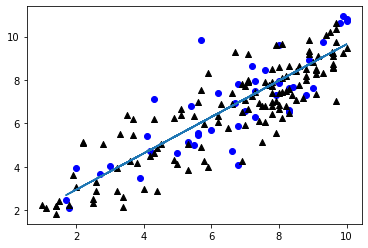

In [24]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [25]:
deep_model = tf.keras.models.Sequential()

In [26]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) *2, activation = 'relu', input_dim = len(X.columns)))

In [27]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) *2, activation = 'relu'))

In [28]:
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [29]:
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [30]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 939
Trainable params: 939
Non-trainable params: 0
_________________________________________________________________


In [31]:
deep_model.compile(loss="mean_squared_error", optimizer="adam")

In [32]:
deep_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 997us/step - loss: 49.3304
Epoch 2/100
5/5 [==============================] - 0s 541us/step - loss: 48.9723
Epoch 3/100
5/5 [==============================] - 0s 547us/step - loss: 48.6542
Epoch 4/100
5/5 [==============================] - 0s 798us/step - loss: 48.3786
Epoch 5/100
5/5 [==============================] - 0s 798us/step - loss: 48.1189
Epoch 6/100
5/5 [==============================] - 0s 902us/step - loss: 47.8587
Epoch 7/100
5/5 [==============================] - 0s 761us/step - loss: 47.5819
Epoch 8/100
5/5 [==============================] - 0s 603us/step - loss: 47.2747
Epoch 9/100
5/5 [==============================] - 0s 867us/step - loss: 46.9208
Epoch 10/100
5/5 [==============================] - 0s 516us/step - loss: 46.5142
Epoch 11/100
5/5 [==============================] - 0s 704us/step - loss: 46.0269
Epoch 12/100
5/5 [==============================] - 0s 599us/step - loss: 45.4347
Epoch 13/100
5/5 [=======

In [33]:
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

In [34]:
r2_score(y_train, y_train_pred)

0.7964799581054025

In [35]:
r2_score(y_test, y_test_pred)

0.6988982067027576

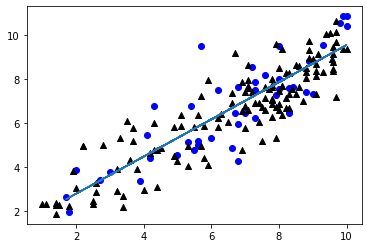

In [36]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
model.score(X_train_scaled, y_train)

0.8665000965222467

In [40]:
model.score(X_test_scaled, y_test)

0.7087415790368

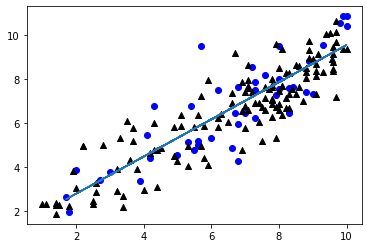

In [41]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [42]:
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [43]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(ols, X_train, y_train))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(ols, X_train, y_train, X.columns)

coef_pval:
 [1.36111524e-01 7.48435884e-02 8.14239679e-06 7.79050827e-01
 7.86615900e-01 6.60507422e-01 2.30926389e-14 1.18611494e-01
 8.51977907e-02 2.75562229e-01 1.19667091e-02 1.86007305e-04
 1.44423079e-02]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
-1.8993 -0.6665 -0.0846  0.6423  2.0101


Coefficients:
                                  Estimate  Std. Error  t value   p value
_intercept                        0.493713    0.329234   1.4996  0.136112
C1: Security Apparatus            0.128711    0.071681   1.7956  0.074844
C3: Group Grievance               0.206956    0.044561   4.6443  0.000008
E1: Economy                      -0.022849    0.081274  -0.2811  0.779051
E2: Economic Inequality           0.020143    0.074257   0.2713  0.786616
E3: Human Flight and Brain Drain -0.029163    0.066248  -0.4402  0.660507
P1: State Legitimacy              0.535301    0.062425   8.5751  0.000000
P2: Public Services              -0.144686    0.092107  

In [44]:
ols = linear_model.LinearRegression()
ols.fit(X_test, y_test)

LinearRegression()

In [45]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(ols, X_test, y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(ols, X_test, y_test, X.columns)

coef_pval:
 [7.25721357e-01 9.25677037e-01 4.49382461e-04 1.50835126e-01
 2.31560671e-02 3.44829003e-01 1.11069261e-04 1.30858528e-01
 6.19208809e-01 8.14532573e-01 1.52363320e-01 5.96644586e-01
 4.91274811e-01]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
-1.7059 -0.6148 -0.1895  0.4752  1.7212


Coefficients:
                                  Estimate  Std. Error  t value   p value
_intercept                        0.202224    0.572759   0.3531  0.725721
C1: Security Apparatus           -0.012704    0.135409  -0.0938  0.925677
C3: Group Grievance               0.400776    0.105640   3.7938  0.000449
E1: Economy                       0.203594    0.139253   1.4620  0.150835
E2: Economic Inequality           0.355217    0.150962   2.3530  0.023156
E3: Human Flight and Brain Drain  0.110080    0.115276   0.9549  0.344829
P1: State Legitimacy              0.464907    0.109517   4.2451  0.000111
P2: Public Services              -0.271792    0.176553  